In [1]:
import pandas as pd

In [2]:
df =pd.read_csv ('Data/ETH_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [3]:
df.shape

(23674, 7)

In [5]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

In [8]:
# df['Date'] = pd.to_datetime(df['Date'])
# Datetime Formatting Codes - http://bit.ly/python-dt-fmt

df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [9]:
df.loc[0, 'Date'].day_name()

'Friday'

In [23]:
# to convert to date as we load the date :
from datetime import datetime
d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')
df =pd.read_csv ('Data/ETH_1h.csv', parse_dates =['Date'], date_parser = d_parser)
df.head()

C:\Temp\ipykernel_21060\2838194805.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df =pd.read_csv ('Data/ETH_1h.csv', parse_dates =['Date'], date_parser = d_parser)


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [25]:
# using dt class on a date object
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [26]:
df['DayofWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [27]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [28]:
df['Date'].max() # to show most recent date

Timestamp('2020-03-13 20:00:00')

In [29]:
df['Date'].max() - df['Date'].min() # number of days in the dataset

Timedelta('986 days 09:00:00')

In [32]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [35]:
df.set_index('Date', inplace=True)
df.head()

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [38]:
# now that date column is indexed we can slice Date as follow
df['2020-01-01' : '2020-03-30']

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [40]:
# calculating average closing price in that date range
df['2020-01-01' : '2020-03-30']['Close'].mean()

197.56875929102344

In [47]:
df['2020-01-01' : '2020-03-30']['High'].max()

290.0

In [50]:
#resampling
# Pandas Date Offset Codes - http://bit.ly/pandas-dt-fmt
highs = df['High'].resample('D').max()
highs['2020-01-01']

132.68

In [51]:
%matplotlib inline # to display plot directly on juputer notebook

<Axes: xlabel='Date'>

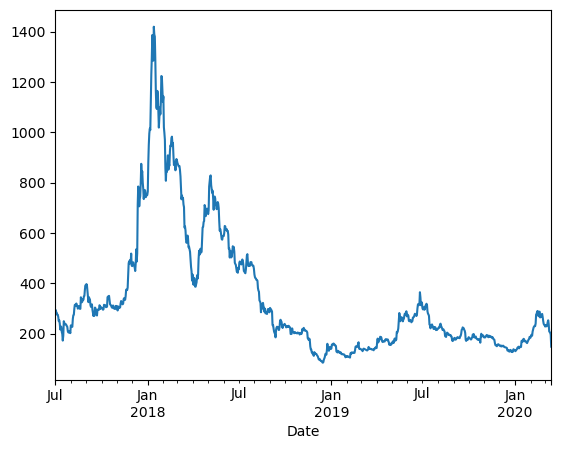

In [52]:
highs.plot()

In [54]:
# to give average value for each column in weeklu basis
means = df.resample('W').mean()

TypeError: Could not convert ETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSDETHUSD to numeric

In [55]:
# passa dictionary to aggregate function for each column
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume':'sum'})

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08
2017-07-23,212.783750,249.40,153.25,7.221637e+08
2017-07-30,203.309524,229.99,178.03,2.657305e+08
...,...,...,...,...
2020-02-16,255.198452,290.00,216.31,3.912867e+08
2020-02-23,265.321905,287.13,242.36,3.067838e+08
2020-03-01,236.373988,278.13,209.26,3.693920e+08
